**классификатор SVM** 

Евгений Борисов  <esborisov@sevsu.ru>

---

SciKit Learn : Support Vector Machines    
https://scikit-learn.org/stable/modules/svm.html

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

%precision 3
np.set_printoptions(precision=2)

# генерируем набор данных

(1024, 2)

(1024,)

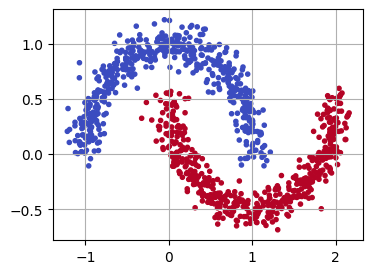

In [2]:
from sklearn.datasets import make_moons
X,target = make_moons(n_samples=1024, noise=.09)

#from sklearn.datasets import make_blobs
#X,target = make_blobs( n_samples=1024, centers=2,  cluster_std=[1.5, 1.8,] )

# target = target.reshape(-1,1)
display(X.shape, target.shape)

fig,ax = plt.subplots( figsize=(4,3),)
ax.scatter(x=X[:,0],y=X[:,1],c=target, marker='.', cmap='coolwarm')
ax.grid()

# нормируем данные

In [3]:
# from sklearn.preprocessing import MinMaxScaler
# X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

from sklearn.preprocessing   import StandardScaler
X = StandardScaler().fit(X).transform(X)

display( ( X.min(),np.mean(X),np.median(X),X.max() ) )

(-1.963, 0.000, 0.001, 1.948)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, target_train, target_test = train_test_split(X,target,test_size=.5)
display( X_train.shape, X_test.shape, )

assert len(target_train) == len(X_train)
assert len(target_test) == len(X_test)

del X,target

(512, 2)

(512, 2)

## обучаем модель

In [6]:
from sklearn import svm

model = svm.SVC( probability=True ).fit(X_train, target_train.flatten())

In [7]:
# svm.SVC(
#     *,
#     C=1.0,
#     kernel='rbf',
#     degree=3,
#     gamma='scale',
#     coef0=0.0,
#     shrinking=True,
#     probability=False,
#     tol=0.001,
#     cache_size=200,
#     class_weight=None,
#     verbose=False,
#     max_iter=-1,
#     decision_function_shape='ovr',
#     break_ties=False,
#     random_state=None,
# )

## тестируем

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       236

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512



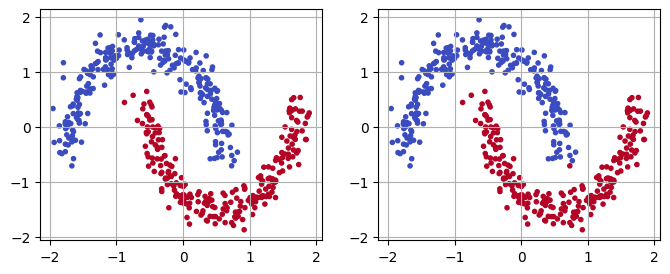

In [8]:
from sklearn.metrics import classification_report

predicted =  model.predict(X_test)
print(classification_report( target_test, predicted) )

fig,ax = plt.subplots(1,2, figsize=(8,3),)
ax[0].scatter(x=X_test[:,0],y=X_test[:,1],c=target_test, marker='.', cmap='coolwarm')
ax[0].grid()
ax[1].scatter(x=X_test[:,0],y=X_test[:,1],c=predicted, marker='.', cmap='coolwarm')
ax[1].grid()

In [ ]:
score = model.predict_proba(X_test)

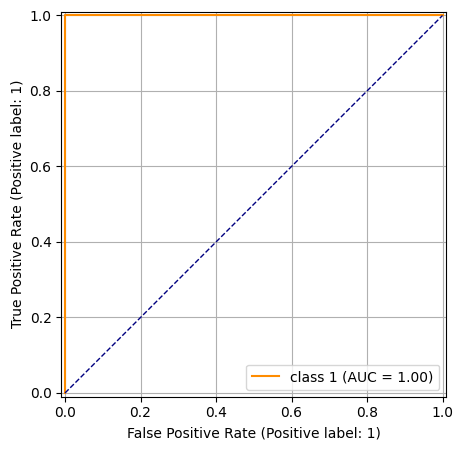

In [13]:
from sklearn.metrics import RocCurveDisplay

fig,ax = plt.subplots( figsize=(6,5),)
RocCurveDisplay.from_predictions( target_test, score[:,1], name='class 1', color='darkorange', ax=ax )
ax.plot([0,1],[0,1], color='navy', lw=1, linestyle='--')
ax.grid()

## карта скоров

In [15]:
# строим сетку 

n = 50 # количество разбиений сетки

xx,yy = np.meshgrid(
    np.linspace( X_test[:,0].min()-0.1, X_test[:,0].max()+0.1, n), 
    np.linspace( X_test[:,1].min()-0.1, X_test[:,1].max()+0.1, n)
) # узлы сетки
display( ( xx.shape, yy.shape ) )

xy = np.vstack([xx.ravel(),yy.ravel() ]).T # разворачиваем сетку 
display( xy.shape )

# plt.figure(figsize=(7,7))
# plt.scatter( x=xy[:,0], y=xy[:,1], s=1 )
# plt.show()

((50, 50), (50, 50))

(2500, 2)

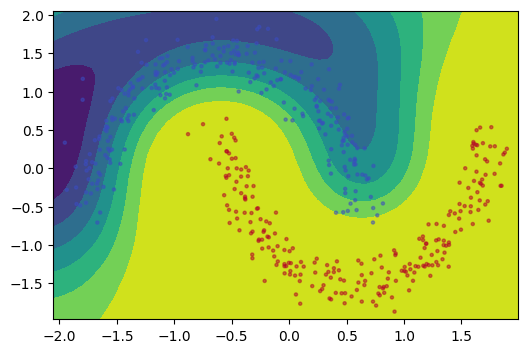

In [22]:
from sklearn.preprocessing import MinMaxScaler

# вычисляем скор для каждого узла сетки
score_xy = model.predict_log_proba(xy)
score_xy = score_xy[:,[1]]
score_xy = MinMaxScaler(feature_range=(0.,1.)).fit_transform( score_xy )
score_xy = score_xy.reshape(n,n) 

from matplotlib.colors import ListedColormap
fig,ax = plt.subplots(figsize=(6,4),sharey=True)
ax.contourf(xx, yy, score_xy )
ax.scatter( x=X_test[:,0], y=X_test[:,1], c=target_test, alpha=.5, s=5,  cmap='coolwarm' )

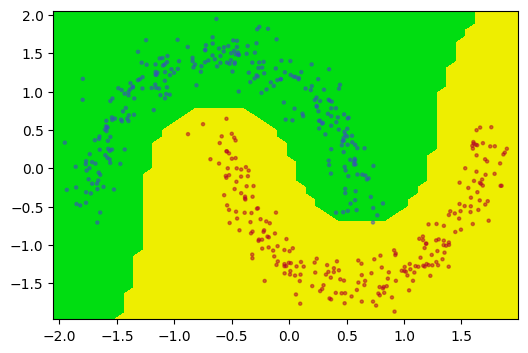

In [18]:
# вычисляем скор для каждого узла сетки
predict_xy = model.predict( xy ).reshape(n,n) 

fig,ax = plt.subplots(figsize=(6,4),sharey=True)
ax.contourf(xx, yy, predict_xy, cmap=ListedColormap(['#0d1','#ee0']) )
ax.scatter( x=X_test[:,0], y=X_test[:,1], c=target_test, alpha=.5, s=5,  cmap='coolwarm' )